In [184]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn import metrics
import xgboost as xgb

In [185]:
df = pd.read_csv('data/train.csv')

In [186]:
df.shape

(71236, 50)

In [187]:
# df = df.drop_duplicates(subset= ['patient_id'], keep = 'first')
# df.shape

In [188]:
# df['patient_id'] = df['patient_id'].astype(str)

In [189]:
df['race'].unique()

array(['Caucasian', 'AfricanAmerican', 'Hispanic', 'Asian', 'Other', nan],
      dtype=object)

In [190]:
df.isnull().sum()

enc_id                          0
patient_id                      0
race                         1621
gender                          0
age                             0
weight                      68986
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  28178
medical_specialty           34930
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         15
diag_2                        244
diag_3                        989
number_diagnoses                0
max_glu_serum               67515
A1Cresult                   59356
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [191]:
df['diag_1'].value_counts()

428    4836
414    4618
786    2791
410    2537
486    2461
       ... 
352       1
133       1
10        1
833       1
906       1
Name: diag_1, Length: 684, dtype: int64

## Data Visualisation

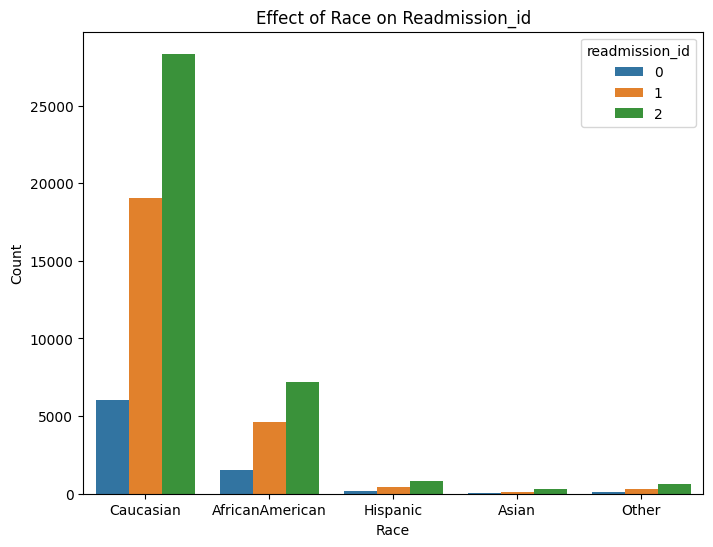

In [192]:
plt.figure(figsize=(8, 6))
sns.countplot(x='race', hue='readmission_id', data=df)
plt.title('Effect of Race on Readmission_id')
plt.xlabel('Race')
plt.ylabel('Count')
plt.show()

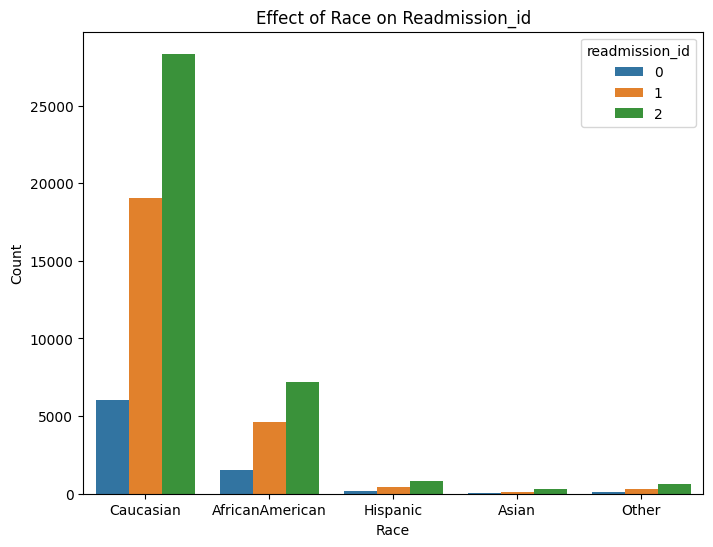

In [193]:
plt.figure(figsize=(8, 6))
sns.countplot(x='race', hue='readmission_id', data=df)
plt.title('Effect of Race on Readmission_id')
plt.xlabel('Race')
plt.ylabel('Count')
plt.show()

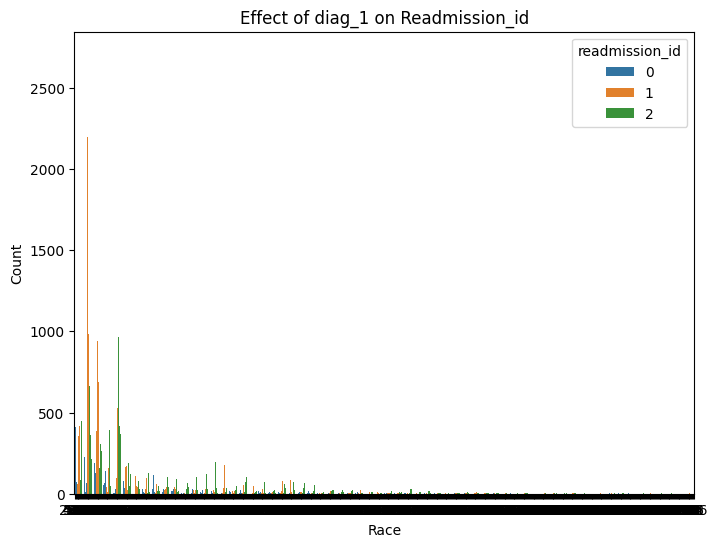

In [194]:
plt.figure(figsize=(8, 6))
sns.countplot(x='diag_1', hue='readmission_id', data=df)
plt.title('Effect of diag_1 on Readmission_id')
plt.xlabel('Race')
plt.ylabel('Count')
plt.show()

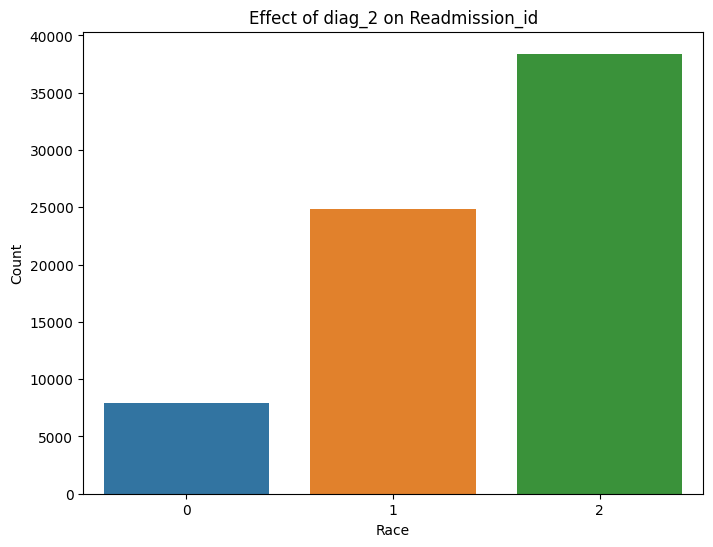

In [195]:
plt.figure(figsize=(8, 6))
sns.countplot(x='readmission_id', data=df)
plt.title('Effect of diag_2 on Readmission_id')
plt.xlabel('Race')
plt.ylabel('Count')
plt.show()

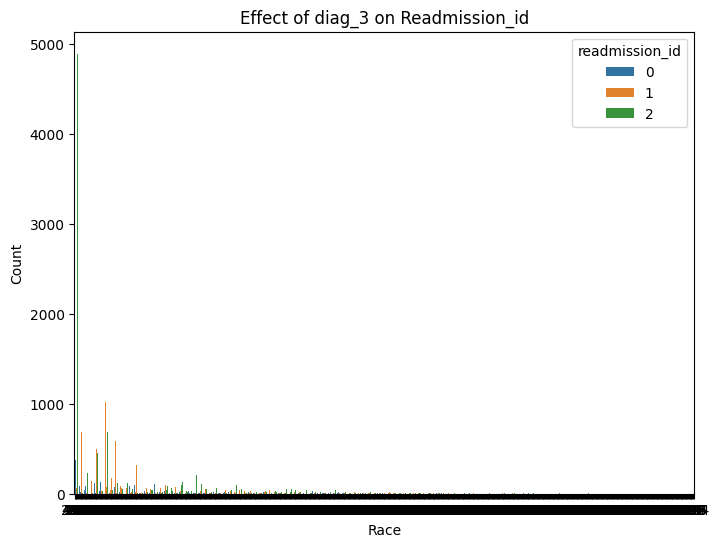

In [196]:
plt.figure(figsize=(8, 6))
sns.countplot(x='diag_3', hue='readmission_id', data=df)
plt.title('Effect of diag_3 on Readmission_id')
plt.xlabel('Race')
plt.ylabel('Count')
plt.show()

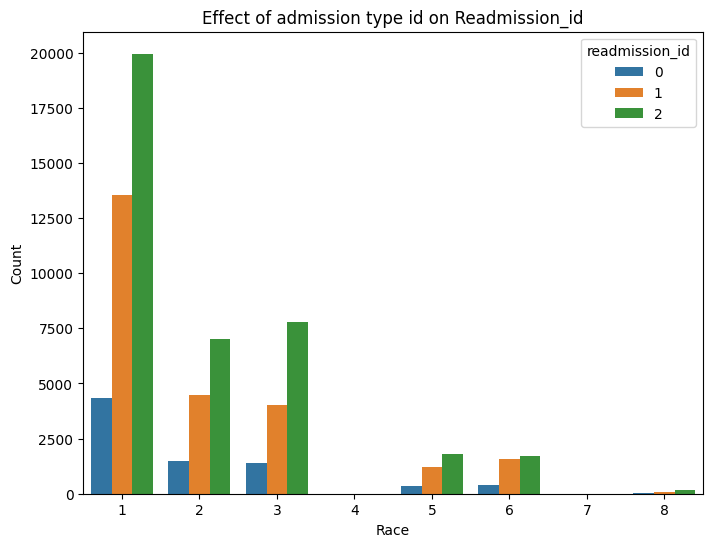

In [197]:
plt.figure(figsize=(8, 6))
sns.countplot(x='admission_type_id', hue='readmission_id', data=df)
plt.title('Effect of admission type id on Readmission_id')
plt.xlabel('Race')
plt.ylabel('Count')
plt.show()

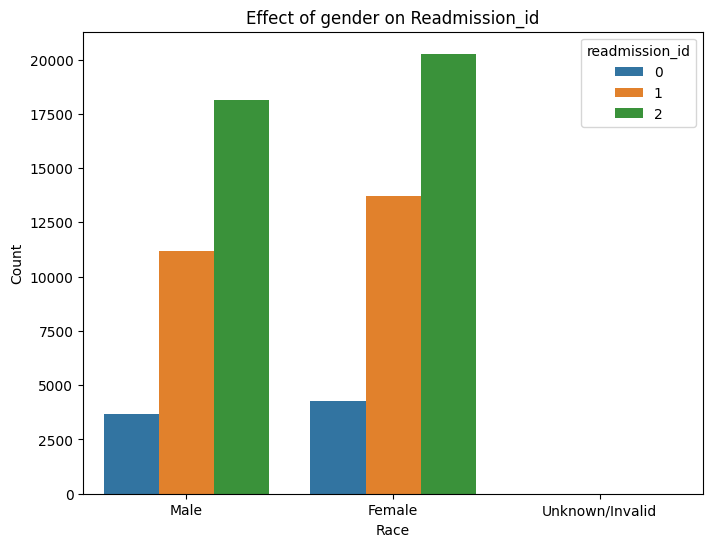

In [198]:
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', hue='readmission_id', data=df)
plt.title('Effect of gender on Readmission_id')
plt.xlabel('Race')
plt.ylabel('Count')
plt.show()

Text(0.5, 1.0, 'Glucose test serum test result VS. Readmission')

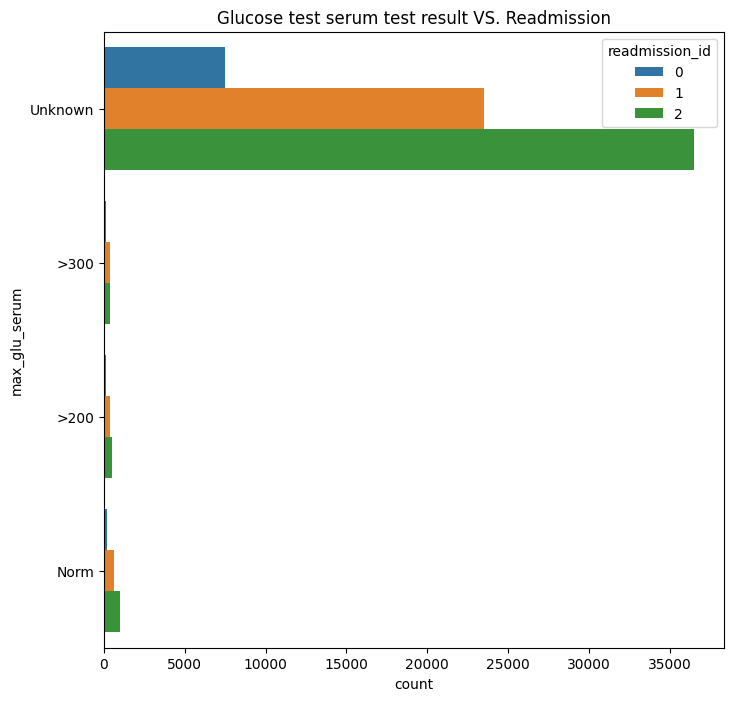

In [199]:
df['max_glu_serum'].fillna('Unknown', inplace=True)
fig = plt.figure(figsize=(8,8))
sns.countplot(y = df['max_glu_serum'], hue = df['readmission_id']).set_title('Glucose test serum test result VS. Readmission')

Text(0.5, 1.0, 'A1C test result VS. Readmission')

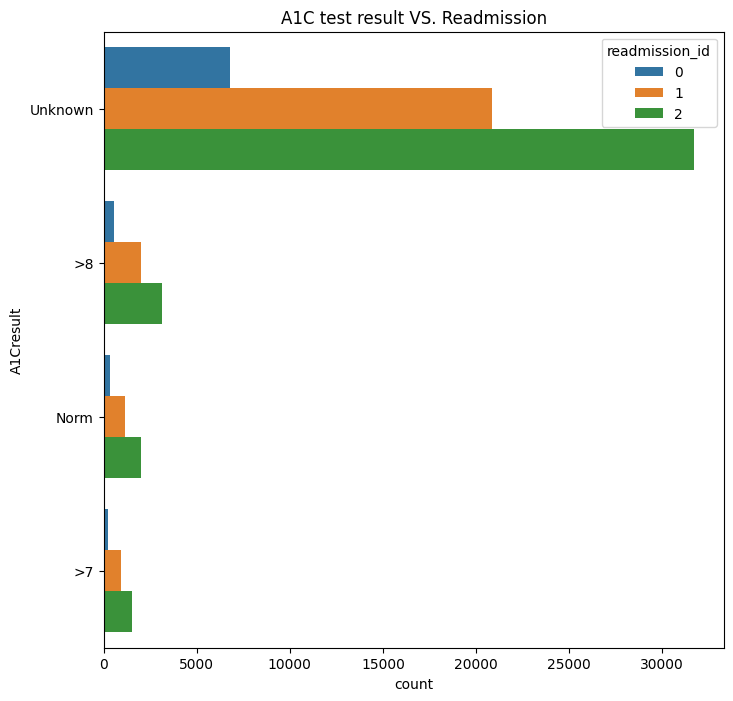

In [200]:
df['A1Cresult'].fillna('Unknown', inplace=True)
fig = plt.figure(figsize=(8,8))
sns.countplot(y= df['A1Cresult'], hue = df['readmission_id']).set_title('A1C test result VS. Readmission')

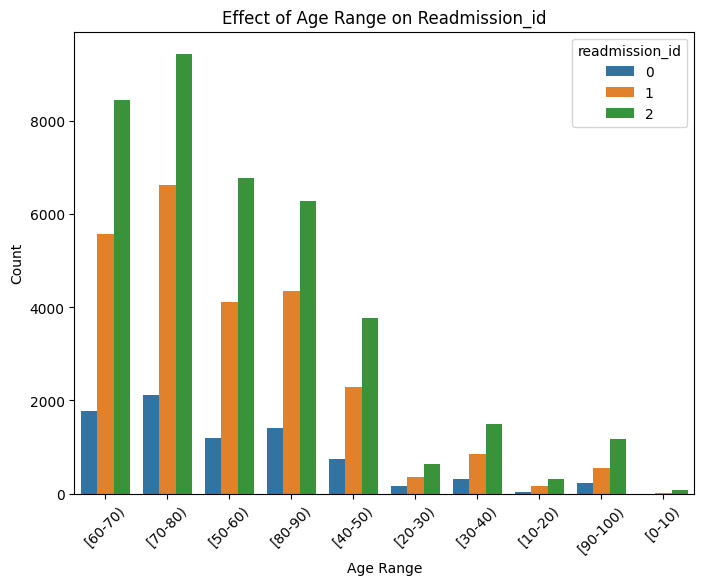

In [201]:
plt.figure(figsize=(8, 6))
sns.countplot(x='age', hue='readmission_id', data=df)
plt.title('Effect of Age Range on Readmission_id')
plt.xlabel('Age Range')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

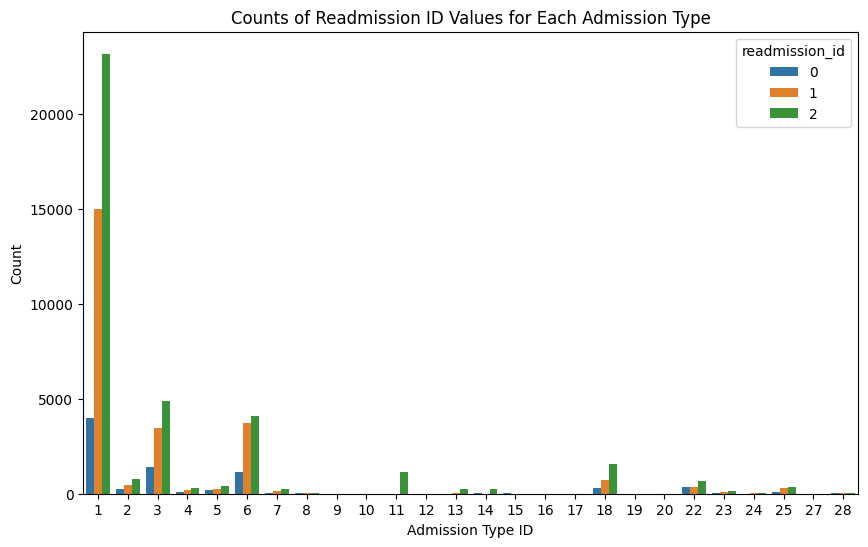

In [202]:
# Create a countplot to visualize the counts of readmission_id values for each admission type
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='discharge_disposition_id', hue='readmission_id')

# Set labels for the chart
plt.xlabel('Admission Type ID')
plt.ylabel('Count')
plt.title('Counts of Readmission ID Values for Each Admission Type')

# Show the chart
plt.show()

# # Sample DataFrame
# data = {'admission_type_id': [1, 2, 3, 4, 5, 6, 7, 8],
#         'readmission_id': [0, 1, 2, 0, 1, 0, 2, 1]}
# df = pd.DataFrame(data)


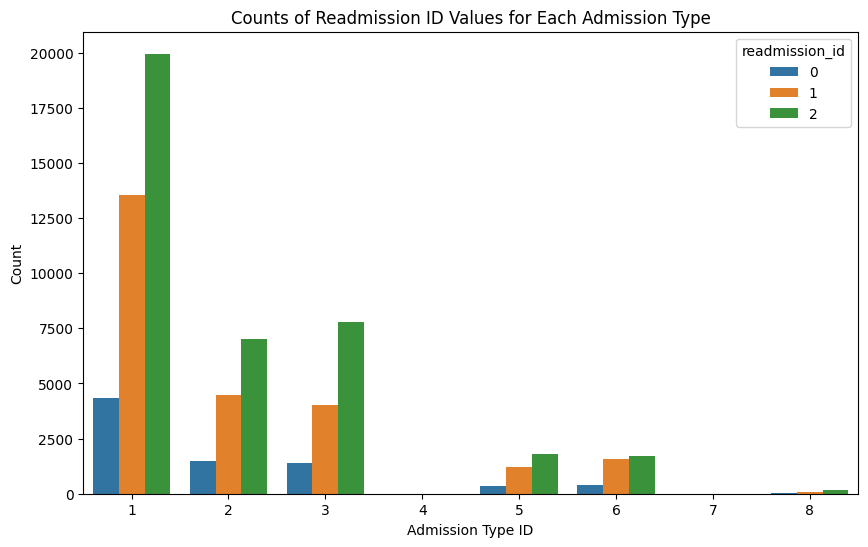

In [203]:
# Create a countplot to visualize the counts of readmission_id values for each admission type
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='admission_type_id', hue='readmission_id')

# Set labels for the chart
plt.xlabel('Admission Type ID')
plt.ylabel('Count')
plt.title('Counts of Readmission ID Values for Each Admission Type')

# Show the chart
plt.show()

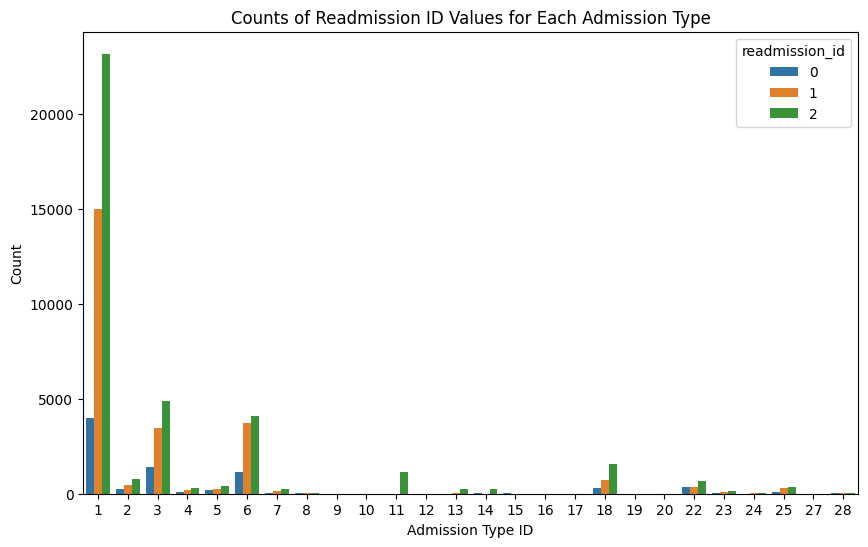

In [204]:
# Create a countplot to visualize the counts of readmission_id values for each admission type
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='discharge_disposition_id', hue='readmission_id')

# Set labels for the chart
plt.xlabel('Admission Type ID')
plt.ylabel('Count')
plt.title('Counts of Readmission ID Values for Each Admission Type')

# Show the chart
plt.show()

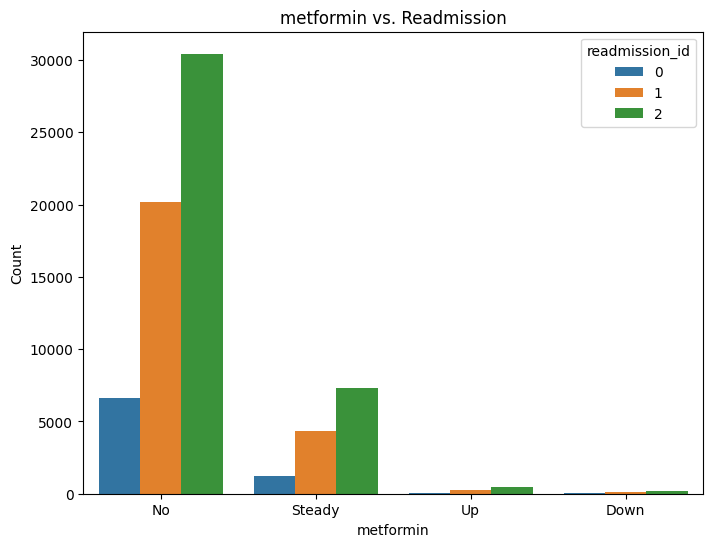

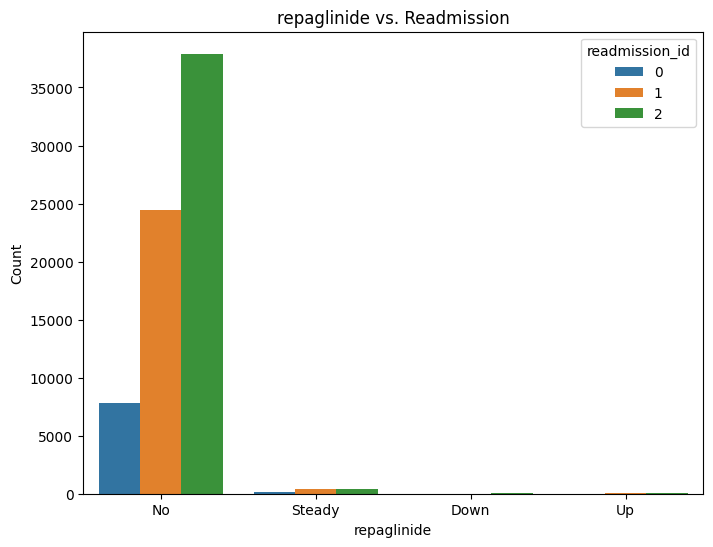

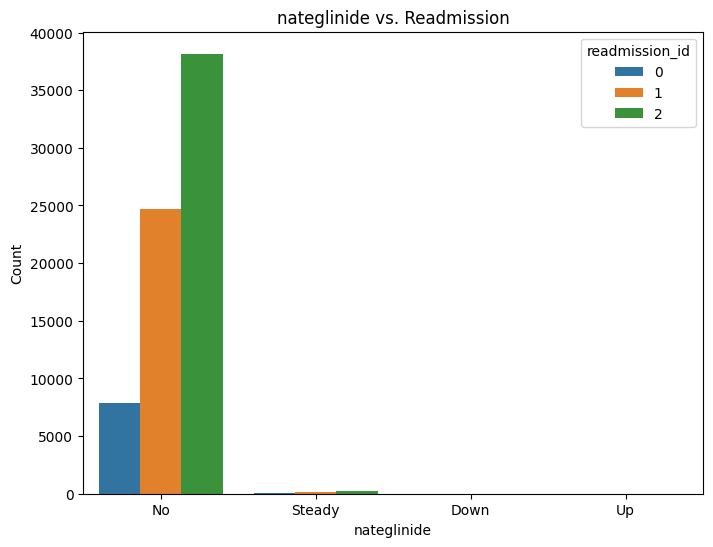

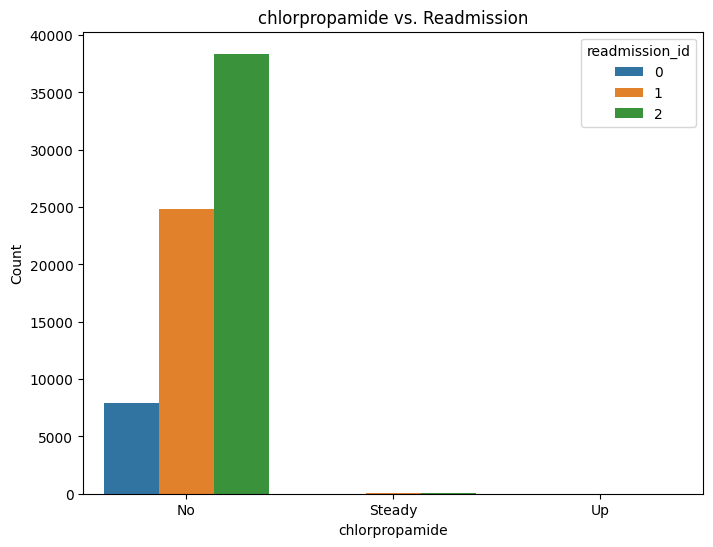

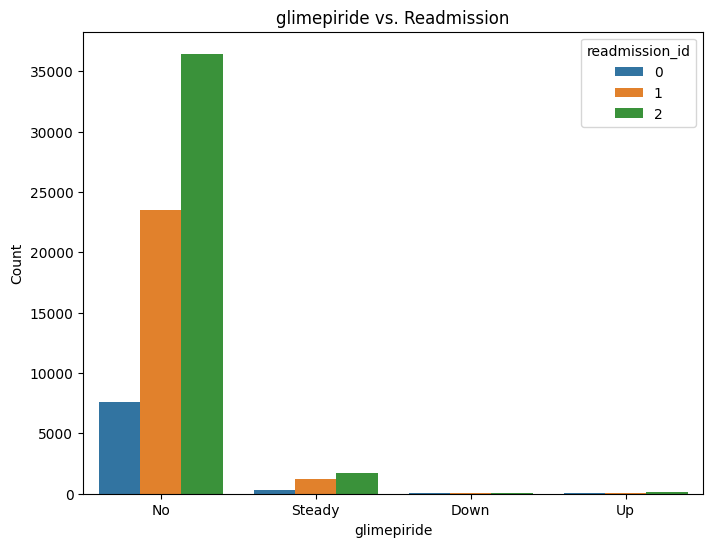

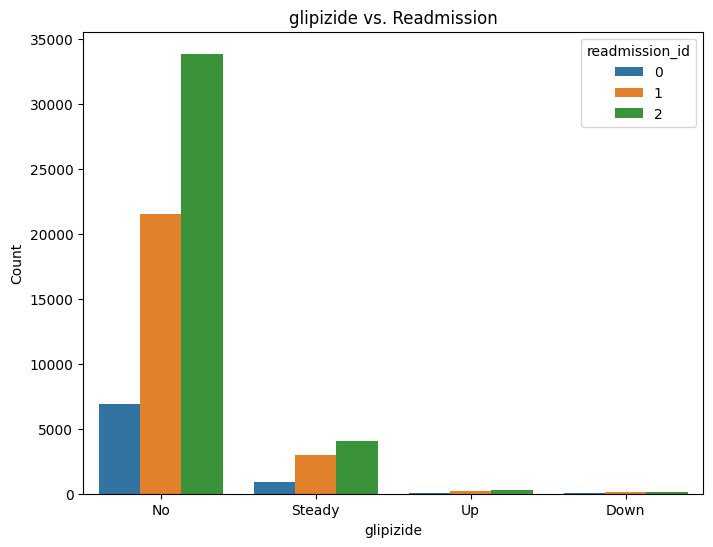

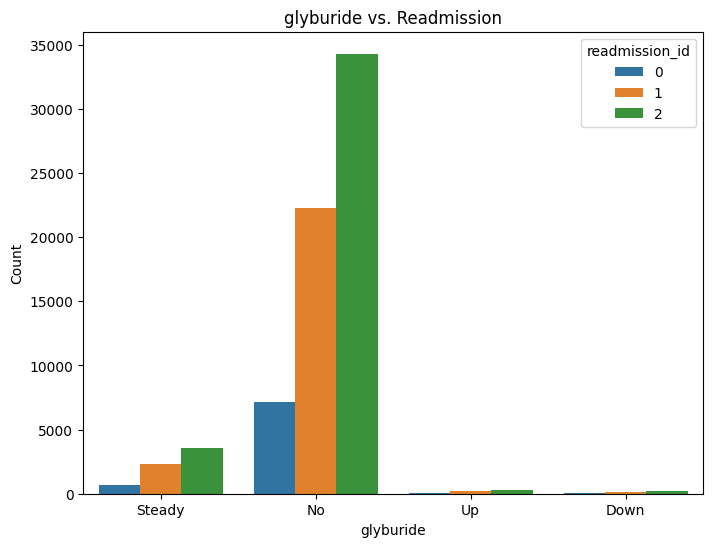

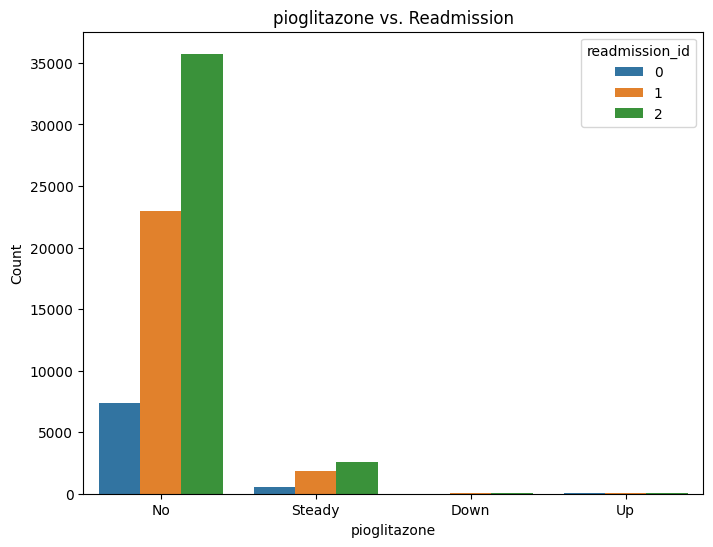

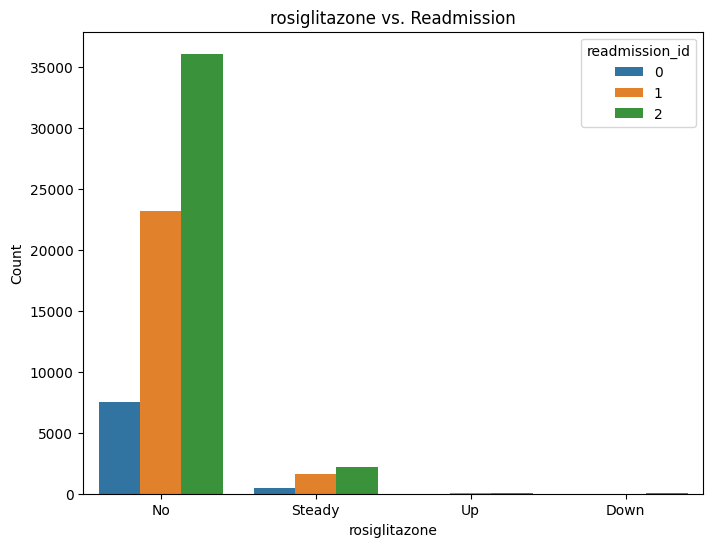

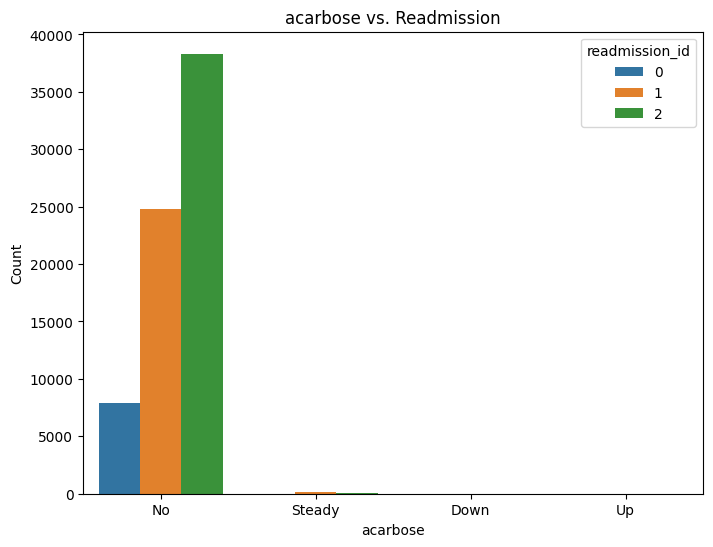

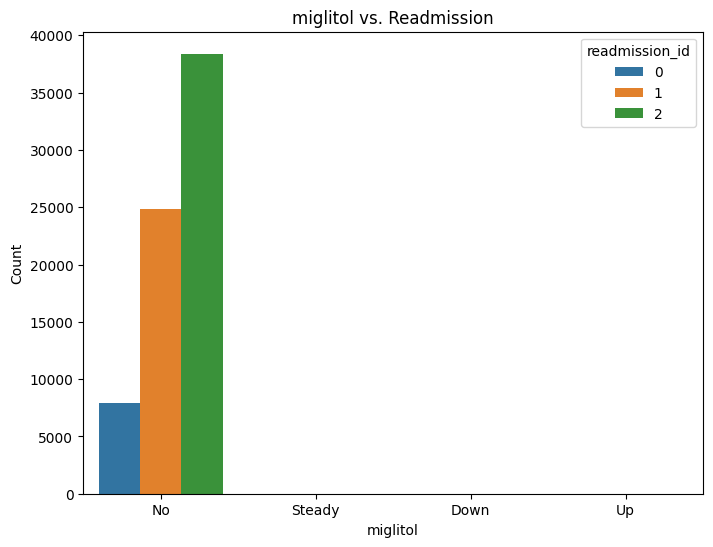

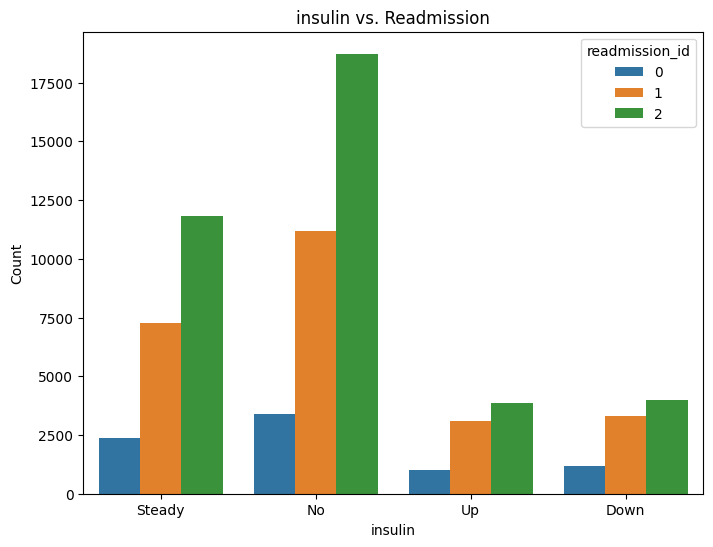

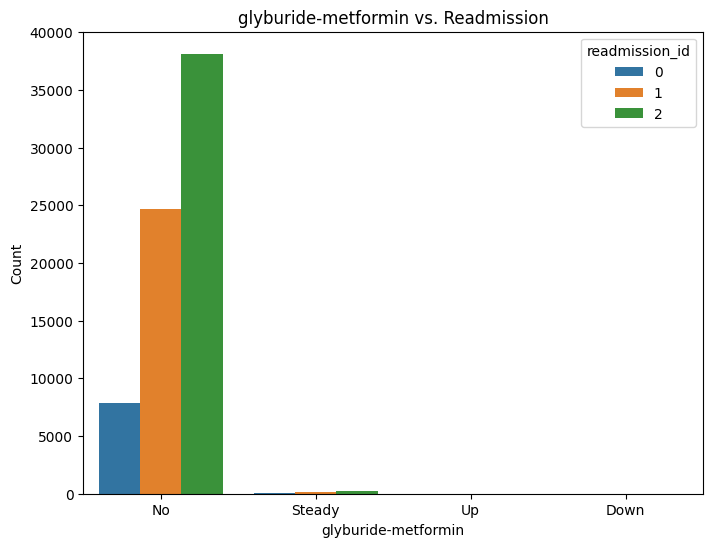

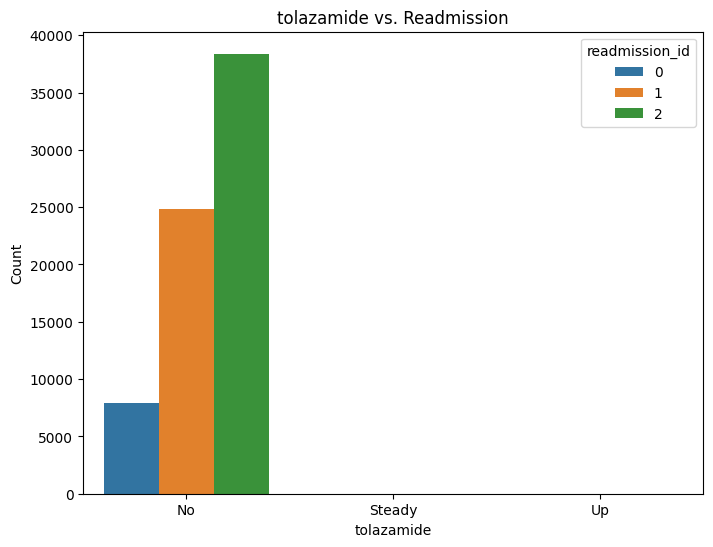

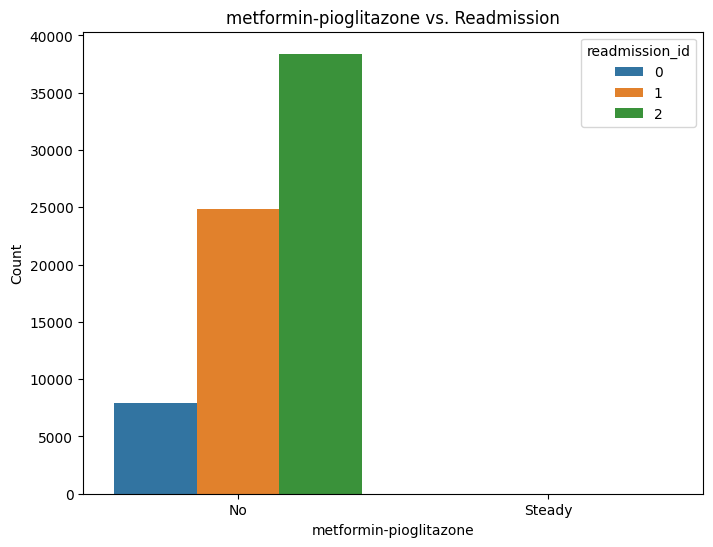

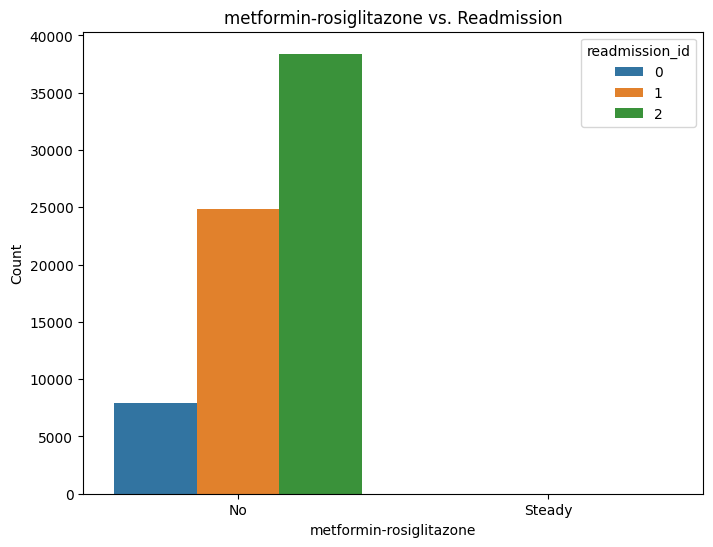

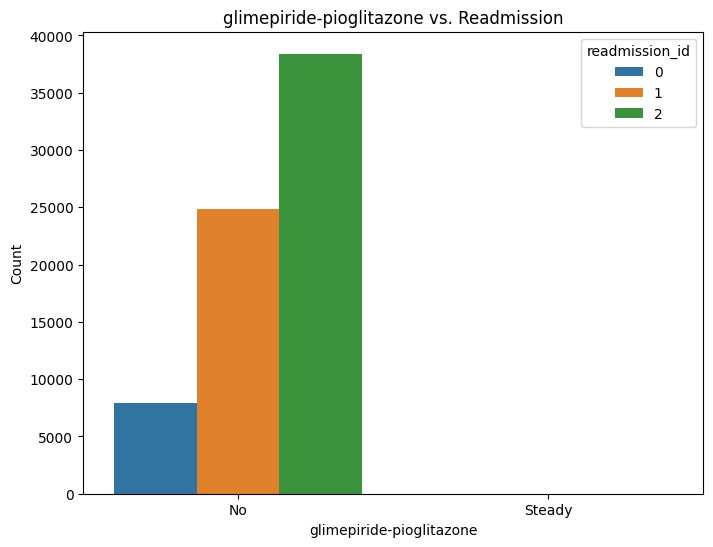

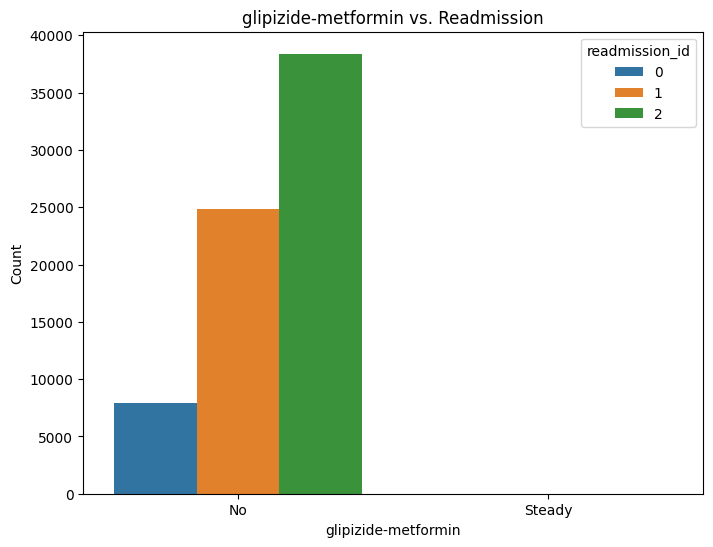

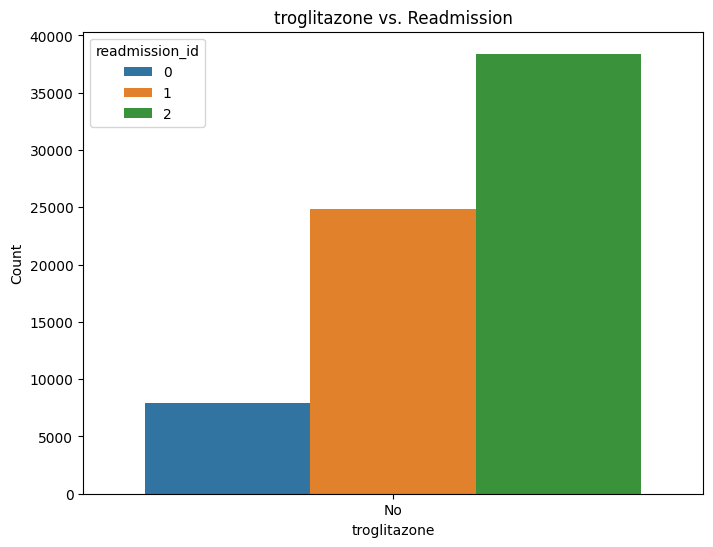

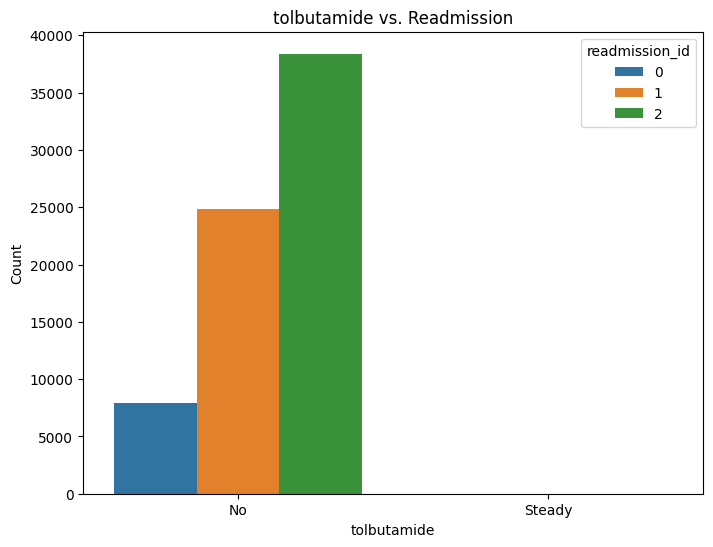

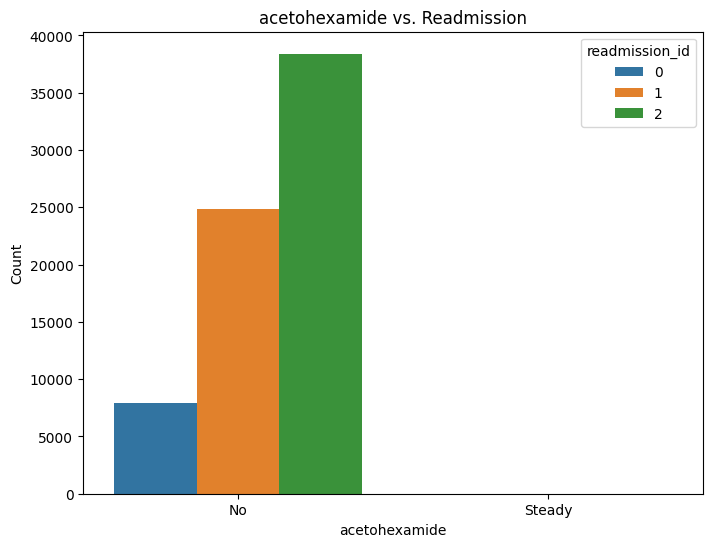

In [205]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of drugs
drugs = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'insulin', 'glyburide-metformin', 'tolazamide', 'metformin-pioglitazone', 'metformin-rosiglitazone', 'glimepiride-pioglitazone', 'glipizide-metformin', 'troglitazone', 'tolbutamide', 'acetohexamide']

# Loop through the drugs and create countplots
for drug in drugs:
    data_to_plot = df[[drug, 'readmission_id']]
    
    # Create a countplot
    plt.figure(figsize=(8, 6))
    sns.countplot(x=drug, hue='readmission_id', data=data_to_plot)
    plt.title(f'{drug} vs. Readmission')
    plt.xlabel(drug)
    plt.ylabel('Count')
    plt.show()

## Outlier Removal

In [206]:
for i in range(1,29):
    filtered_df = df[df['admission_type_id'] == i]

# Calculate the ratio of counts for 0s, 1s, and 2s in readmission_id
    count_0 = (filtered_df['readmission_id'] == 0).sum()
    count_1 = (filtered_df['readmission_id'] == 1).sum()
    count_2 = (filtered_df['readmission_id'] == 2).sum()

    total_counts = count_0 + count_1 + count_2
    if(total_counts==0):
        print("Remove:",i)
        continue
# Calculate the ratios
    ratio_0 = count_0 / total_counts
    ratio_1 = count_1 / total_counts
    ratio_2 = count_2 / total_counts
    print("ID=",i)
# Display the ratios
    print(f'Ratio of 0s: {ratio_0:.2f}')
    print(f'Ratio of 1s: {ratio_1:.2f}')
    print(f'Ratio of 2s: {ratio_2:.2f}')

ID= 1
Ratio of 0s: 0.11
Ratio of 1s: 0.36
Ratio of 2s: 0.53
ID= 2
Ratio of 0s: 0.11
Ratio of 1s: 0.35
Ratio of 2s: 0.54
ID= 3
Ratio of 0s: 0.10
Ratio of 1s: 0.30
Ratio of 2s: 0.59
ID= 4
Ratio of 0s: 0.12
Ratio of 1s: 0.12
Ratio of 2s: 0.75
ID= 5
Ratio of 0s: 0.10
Ratio of 1s: 0.36
Ratio of 2s: 0.54
ID= 6
Ratio of 0s: 0.11
Ratio of 1s: 0.43
Ratio of 2s: 0.46
ID= 7
Ratio of 0s: 0.00
Ratio of 1s: 0.00
Ratio of 2s: 1.00
ID= 8
Ratio of 0s: 0.08
Ratio of 1s: 0.26
Ratio of 2s: 0.67
Remove: 9
Remove: 10
Remove: 11
Remove: 12
Remove: 13
Remove: 14
Remove: 15
Remove: 16
Remove: 17
Remove: 18
Remove: 19
Remove: 20
Remove: 21
Remove: 22
Remove: 23
Remove: 24
Remove: 25
Remove: 26
Remove: 27
Remove: 28


In [207]:
print(df['admission_type_id'].value_counts())

1    37831
3    13188
2    12979
6     3675
5     3321
8      227
4        8
7        7
Name: admission_type_id, dtype: int64


In [208]:
df['admission_type_id'] = df['admission_type_id'].replace(2,1)
df['admission_type_id'] = df['admission_type_id'].replace(7,4)
df['admission_type_id'] = df['admission_type_id'].replace(5,0)
df['admission_type_id'] = df['admission_type_id'].replace(3,0)
df['admission_type_id'] = df['admission_type_id'].replace(6,0)
df['admission_type_id'] = df['admission_type_id'].replace(8,0)
print(df['admission_type_id'].value_counts())

1    50810
0    20411
4       15
Name: admission_type_id, dtype: int64


In [209]:
print(df['discharge_disposition_id'].value_counts())

1     42161
3      9786
6      8984
18     2603
2      1472
22     1385
11     1154
5       847
25      716
4       570
7       444
23      282
13      271
14      269
28      101
8        78
15       37
24       33
9        15
16        8
17        7
19        5
10        3
27        2
12        2
20        1
Name: discharge_disposition_id, dtype: int64


In [210]:
for i in range(1,30):
    filtered_df = df[df['discharge_disposition_id'] == i]
# Calculate the ratio of counts for 0s, 1s, and 2s in readmission_id
    count_0 = (filtered_df['readmission_id'] == 0).sum()
    count_1 = (filtered_df['readmission_id'] == 1).sum()
    count_2 = (filtered_df['readmission_id'] == 2).sum()

    total_counts = count_0 + count_1 + count_2
    if(total_counts==0):
        print("Remove:",i)
        continue
# Calculate the ratios
    ratio_0 = count_0 / total_counts
    ratio_1 = count_1 / total_counts
    ratio_2 = count_2 / total_counts
    print("ID=",i)
# Display the ratios
    print(f'Ratio of 0s: {ratio_0:.2f}')
    print(f'Ratio of 1s: {ratio_1:.2f}')
    print(f'Ratio of 2s: {ratio_2:.2f}')

ID= 1
Ratio of 0s: 0.09
Ratio of 1s: 0.36
Ratio of 2s: 0.55
ID= 2
Ratio of 0s: 0.16
Ratio of 1s: 0.31
Ratio of 2s: 0.53
ID= 3
Ratio of 0s: 0.14
Ratio of 1s: 0.36
Ratio of 2s: 0.50
ID= 4
Ratio of 0s: 0.14
Ratio of 1s: 0.35
Ratio of 2s: 0.52
ID= 5
Ratio of 0s: 0.22
Ratio of 1s: 0.29
Ratio of 2s: 0.49
ID= 6
Ratio of 0s: 0.13
Ratio of 1s: 0.42
Ratio of 2s: 0.46
ID= 7
Ratio of 0s: 0.14
Ratio of 1s: 0.35
Ratio of 2s: 0.50
ID= 8
Ratio of 0s: 0.15
Ratio of 1s: 0.33
Ratio of 2s: 0.51
ID= 9
Ratio of 0s: 0.40
Ratio of 1s: 0.07
Ratio of 2s: 0.53
ID= 10
Ratio of 0s: 0.00
Ratio of 1s: 0.67
Ratio of 2s: 0.33
ID= 11
Ratio of 0s: 0.00
Ratio of 1s: 0.00
Ratio of 2s: 1.00
ID= 12
Ratio of 0s: 0.50
Ratio of 1s: 0.00
Ratio of 2s: 0.50
ID= 13
Ratio of 0s: 0.04
Ratio of 1s: 0.08
Ratio of 2s: 0.88
ID= 14
Ratio of 0s: 0.07
Ratio of 1s: 0.02
Ratio of 2s: 0.91
ID= 15
Ratio of 0s: 0.41
Ratio of 1s: 0.30
Ratio of 2s: 0.30
ID= 16
Ratio of 0s: 0.00
Ratio of 1s: 0.38
Ratio of 2s: 0.62
ID= 17
Ratio of 0s: 0.00
Ratio of

In [211]:
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(6,1)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(8,1)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(9,1)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(13,1)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(3,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(4,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(5,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(14,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(22,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(23,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(24,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(12,10)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(15,10)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(16,10)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(17,10)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(25,18)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(26,18)
print(df['discharge_disposition_id'].value_counts())

1     51509
2     14644
18     3319
11     1154
7       444
28      101
10       57
19        5
27        2
20        1
Name: discharge_disposition_id, dtype: int64


In [212]:
print(df['admission_source_id'].value_counts())

7     40268
1     20701
17     4683
4      2239
6      1602
2       775
5       613
3       134
20      115
9        79
8        11
22        7
10        3
14        2
11        2
25        1
13        1
Name: admission_source_id, dtype: int64


In [213]:
for i in range(1,30):
    filtered_df = df[df['admission_source_id'] == i]
# Calculate the ratio of counts for 0s, 1s, and 2s in readmission_id
    count_0 = (filtered_df['readmission_id'] == 0).sum()
    count_1 = (filtered_df['readmission_id'] == 1).sum()
    count_2 = (filtered_df['readmission_id'] == 2).sum()

    total_counts = count_0 + count_1 + count_2
    if(total_counts==0):
        print("Remove:",i)
        continue
# Calculate the ratios
    ratio_0 = count_0 / total_counts
    ratio_1 = count_1 / total_counts
    ratio_2 = count_2 / total_counts
    print("ID=",i)
# Display the ratios
    print(f'Ratio of 0s: {ratio_0:.2f}')
    print(f'Ratio of 1s: {ratio_1:.2f}')
    print(f'Ratio of 2s: {ratio_2:.2f}')

ID= 1
Ratio of 0s: 0.11
Ratio of 1s: 0.33
Ratio of 2s: 0.57
ID= 2
Ratio of 0s: 0.11
Ratio of 1s: 0.28
Ratio of 2s: 0.61
ID= 3
Ratio of 0s: 0.14
Ratio of 1s: 0.35
Ratio of 2s: 0.51
ID= 4
Ratio of 0s: 0.09
Ratio of 1s: 0.20
Ratio of 2s: 0.71
ID= 5
Ratio of 0s: 0.12
Ratio of 1s: 0.28
Ratio of 2s: 0.61
ID= 6
Ratio of 0s: 0.10
Ratio of 1s: 0.17
Ratio of 2s: 0.73
ID= 7
Ratio of 0s: 0.12
Ratio of 1s: 0.38
Ratio of 2s: 0.51
ID= 8
Ratio of 0s: 0.18
Ratio of 1s: 0.27
Ratio of 2s: 0.55
ID= 9
Ratio of 0s: 0.09
Ratio of 1s: 0.14
Ratio of 2s: 0.77
ID= 10
Ratio of 0s: 0.00
Ratio of 1s: 0.00
Ratio of 2s: 1.00
ID= 11
Ratio of 0s: 0.00
Ratio of 1s: 0.00
Ratio of 2s: 1.00
Remove: 12
ID= 13
Ratio of 0s: 0.00
Ratio of 1s: 0.00
Ratio of 2s: 1.00
ID= 14
Ratio of 0s: 0.00
Ratio of 1s: 0.00
Ratio of 2s: 1.00
Remove: 15
Remove: 16
ID= 17
Ratio of 0s: 0.10
Ratio of 1s: 0.37
Ratio of 2s: 0.53
Remove: 18
Remove: 19
ID= 20
Ratio of 0s: 0.14
Ratio of 1s: 0.52
Ratio of 2s: 0.34
Remove: 21
ID= 22
Ratio of 0s: 0.29
Rat

In [214]:
df['admission_source_id'] = df['admission_source_id'].replace(2,1)
df['admission_source_id'] = df['admission_source_id'].replace(3,1)
df['admission_source_id'] = df['admission_source_id'].replace(5,4)
df['admission_source_id'] = df['admission_source_id'].replace(6,4)
df['admission_source_id'] = df['admission_source_id'].replace(10,4)
df['admission_source_id'] = df['admission_source_id'].replace(22,4)
df['admission_source_id'] = df['admission_source_id'].replace(25,4)
df['admission_source_id'] = df['admission_source_id'].replace(15,9)
df['admission_source_id'] = df['admission_source_id'].replace(17,9)
df['admission_source_id'] = df['admission_source_id'].replace(20,9)
df['admission_source_id'] = df['admission_source_id'].replace(21,9)
df['admission_source_id'] = df['admission_source_id'].replace(13,11)
df['admission_source_id'] = df['admission_source_id'].replace(14,11)
print(df['admission_source_id'].value_counts())

7     40268
1     21610
9      4877
4      4465
8        11
11        5
Name: admission_source_id, dtype: int64


In [215]:
def plotOutliers(df, columns):
    for col in columns:
        plt.figure(figsize=(8, 6))
        sns.boxplot(x=df[col])
        plt.title(f'Boxplot of {col}')
        plt.show()

def getCountOutliers(df):
    for col in df.columns:
        if col not in ['num_lab_procedures','num_procedures','num_medications','number_outpatient','number_emergency','number_inpatient','number_diagnoses']:
            continue
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - (1.5 * iqr)
        upper_bound = q3 + (1.5 * iqr)
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]
        print(f"Col Name: {col} | Col Total Values: {len(df[col])} | Outliers: {outliers}")

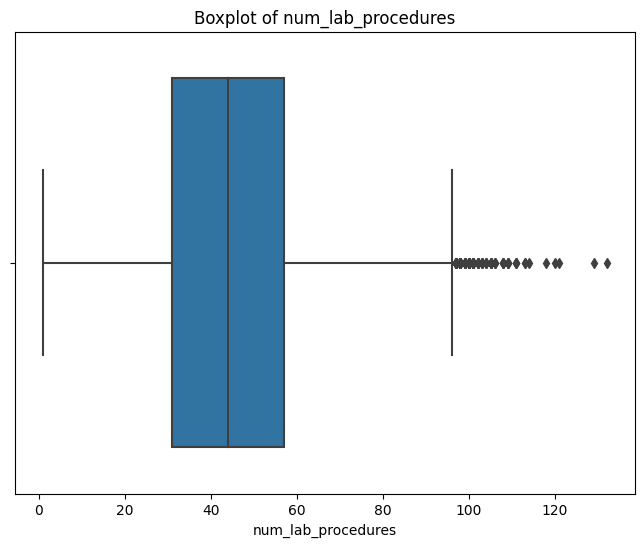

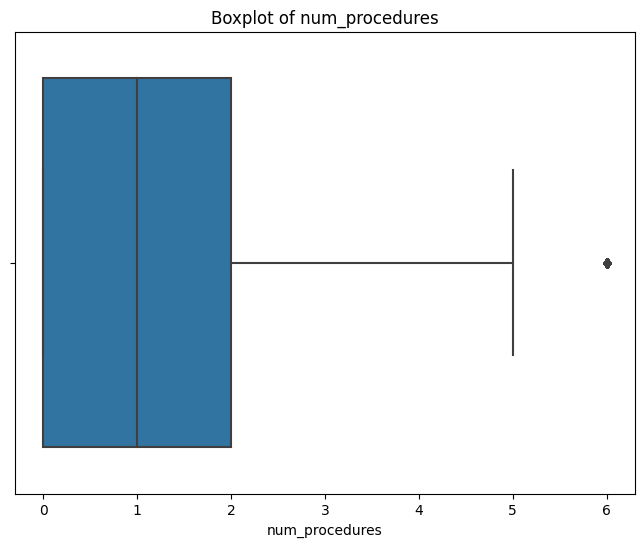

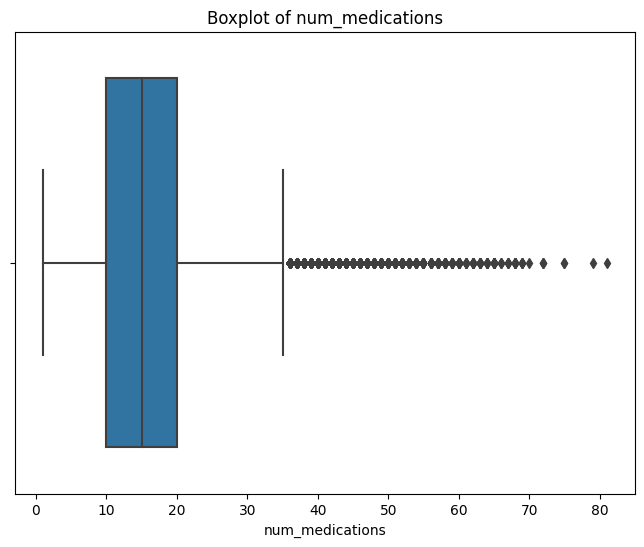

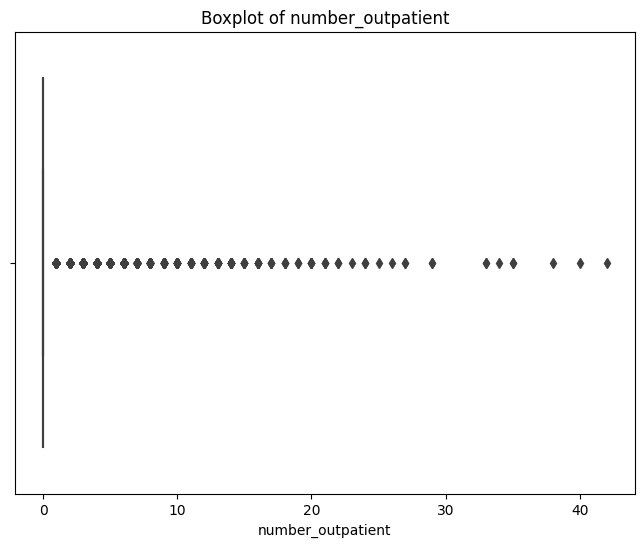

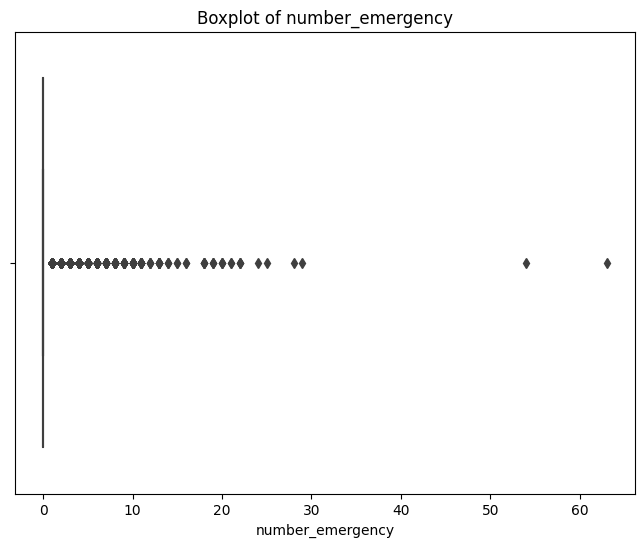

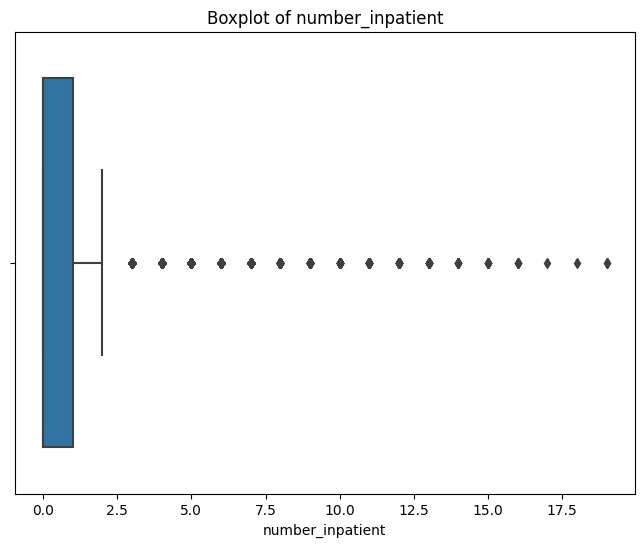

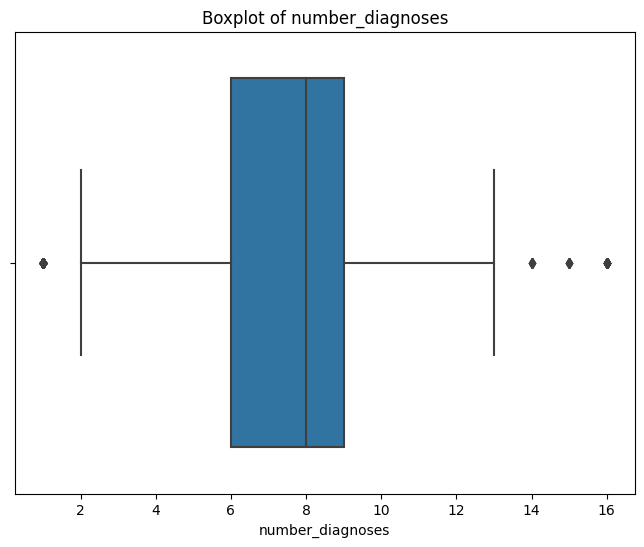

In [216]:
plotOutliers(df, ['num_lab_procedures','num_procedures','num_medications','number_outpatient','number_emergency','number_inpatient','number_diagnoses'])

In [217]:
getCountOutliers(df)

Col Name: num_lab_procedures | Col Total Values: 71236 | Outliers: 103
Col Name: num_procedures | Col Total Values: 71236 | Outliers: 3461
Col Name: num_medications | Col Total Values: 71236 | Outliers: 1801
Col Name: number_outpatient | Col Total Values: 71236 | Outliers: 11698
Col Name: number_emergency | Col Total Values: 71236 | Outliers: 7962
Col Name: number_inpatient | Col Total Values: 71236 | Outliers: 4901
Col Name: number_diagnoses | Col Total Values: 71236 | Outliers: 185


In [218]:
def remove_outliers(df, columns):
    new_df = df.copy()
    for col in columns:
        Q1 = new_df[col].quantile(0.25)
        Q3 = new_df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # new_df = new_df[(new_df[col] >= lower_bound) & (new_df[col] <= upper_bound)]
        # instead of removing outliers, we will cap them
        new_df.loc[new_df[col] < lower_bound, col] = lower_bound
        new_df.loc[new_df[col] > upper_bound, col] = upper_bound
    return new_df

In [219]:
# print(f"Shape before removing outliers: {df.shape}")
# df = remove_outliers(df, ['num_lab_procedures','num_procedures','num_medications','number_outpatient','number_emergency','number_inpatient','number_diagnoses'])
# print(f"Shape after removing outliers: {df.shape}")

## Pre-Processing

In [220]:
df['age'].value_counts()

[70-80)     18179
[60-70)     15801
[50-60)     12080
[80-90)     12037
[40-50)      6785
[30-40)      2650
[90-100)     1940
[20-30)      1165
[10-20)       495
[0-10)        104
Name: age, dtype: int64

In [221]:
# for i in range(0,10):
#     df['age'] = df['age'].replace('['+str(10*i)+'-'+str(10*(i+1))+')',i)
# df['age'].value_counts()

#### The columns citoglipton and examide have just 1 value, thus they will not affect the classification

In [222]:
df['change'] = df['change'].replace('Ch', 1)
df['change'] = df['change'].replace('No', 0)
df['gender'] = df['gender'].replace('Male', 1)
df['gender'] = df['gender'].replace('Female', 0)
df['diabetesMed'] = df['diabetesMed'].replace('Yes', 1)
df['diabetesMed'] = df['diabetesMed'].replace('No', 0)
categorical_df=df.drop(['enc_id','weight','race','medical_specialty',
       'time_in_hospital', 'payer_code',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses','A1Cresult','max_glu_serum'],axis=1)
print(categorical_df.shape)
print(categorical_df.columns)

(71236, 35)
Index(['patient_id', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'diag_1', 'diag_2',
       'diag_3', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmission_id'],
      dtype='object')


In [223]:
categorical_df.head(20)

,patient_id,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,diag_1,diag_2,diag_3,metformin,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmission_id
0,2488608,1,[60-70),1,2,4,410,428,414,No,...,No,Steady,No,No,No,No,No,1,1,2
1,52133202,1,[70-80),1,1,1,414,424,428,Steady,...,No,No,No,No,No,No,No,0,1,1
2,40945509,0,[70-80),0,2,1,518,514,997,No,...,No,Up,No,No,No,No,No,1,1,1
3,38850777,0,[50-60),1,1,7,592,591,250,Steady,...,No,No,No,No,No,No,No,0,1,2
4,72738225,0,[80-90),1,1,7,250.6,713,707,No,...,No,Down,No,No,No,No,No,1,1,2
5,56850768,0,[70-80),1,1,7,599,496,276,Steady,...,No,Steady,No,No,No,No,No,1,1,1
6,3570651,1,[80-90),1,2,7,531,428,584,Steady,...,No,No,No,No,No,No,No,0,1,1
7,3132000,1,[60-70),0,18,4,V57,707,250.7,No,...,No,Steady,No,No,No,No,No,0,1,1
8,58997583,1,[70-80),0,1,7,518,428,496,No,...,No,Steady,No,No,No,No,No,0,1,2
9,139051085,1,[60-70),1,1,7,850,250.01,805,No,...,No,Down,No,No,No,No,No,1,1,2


In [224]:
# categorical_df = categorical_df.dropna()

## Feature Engineering for patient details

In [225]:
features = df[['num_medications','time_in_hospital','num_procedures','num_lab_procedures','number_diagnoses','number_emergency','number_inpatient',
'number_outpatient']]

In [226]:
drugs = ['metformin', 'repaglinide','glimepiride', 'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone','insulin','citoglipton','nateglinide','chlorpropamide','acarbose','miglitol','glyburide-metformin', 'tolazamide','metformin-pioglitazone', 'metformin-rosiglitazone', 'glimepiride-pioglitazone', 'glipizide-metformin','troglitazone', 'tolbutamide', 'acetohexamide','examide']

In [227]:
print(len(drugs))

23


In [228]:
categorical_df['change'] = categorical_df['change'].replace('Ch', 1)
categorical_df['change'] = categorical_df['change'].replace('No', 0)
categorical_df['gender'] = categorical_df['gender'].replace('Male', 1)
categorical_df['gender'] = categorical_df['gender'].replace('Female', 0)
categorical_df['gender'] = categorical_df['gender'].replace('Unknown/Invalid', 0)
categorical_df['diabetesMed'] = categorical_df['diabetesMed'].replace('Yes', 1)
categorical_df['diabetesMed'] = categorical_df['diabetesMed'].replace('No', 0)
categorical_df["drug_change_sum"]=0
for col in drugs:
    categorical_df[col] = categorical_df[col].replace('No', 0)
    categorical_df[col] = categorical_df[col].replace('Steady', 0)
    categorical_df[col] = categorical_df[col].replace('Up', 1)
    categorical_df[col] = categorical_df[col].replace('Down', 1)
for col in drugs:
    categorical_df["drug_change_sum"]+=categorical_df[col]
categorical_df=categorical_df.drop(columns=drugs,axis=1)
print(categorical_df.shape)

(71236, 13)


In [229]:
# for i in range(0,4):
#     for col in drugs:
#         filtered_df = df[df[col] == i]
#         count_0 = (filtered_df['admission_source_id'] == 0).sum()
#         count_1 = (filtered_df['admission_source_id'] == 1).sum()
#         count_2 = (filtered_df['admission_source_id'] == 2).sum()
#         total_counts = count_0 + count_1 + count_2
#         if(total_counts==0):
#             print("Remove:",i)
#         continue
#         ratio_0 = count_0 / total_counts
#         ratio_1 = count_1 / total_counts
#         ratio_2 = count_2 / total_counts
#         print("ID=",i)
#     print(f'Ratio of 0s: {ratio_0:.2f}')
#     print(f'Ratio of 1s: {ratio_1:.2f}')
#     print(f'Ratio of 2s: {ratio_2:.2f}')

In [230]:
categorical_df.fillna(0)

,patient_id,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,diag_1,diag_2,diag_3,change,diabetesMed,readmission_id,drug_change_sum
0,2488608,1,[60-70),1,2,4,410,428,414,1,1,2,0
1,52133202,1,[70-80),1,1,1,414,424,428,0,1,1,0
2,40945509,0,[70-80),0,2,1,518,514,997,1,1,1,1
3,38850777,0,[50-60),1,1,7,592,591,250,0,1,2,0
4,72738225,0,[80-90),1,1,7,250.6,713,707,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71231,85063725,1,[70-80),1,1,7,250.42,276,403,0,1,1,0
71232,86244345,1,[90-100),1,2,7,38,518,486,0,0,2,0
71233,5131368,1,[70-80),0,1,1,414,285,276,1,1,2,0
71234,85969035,1,[50-60),1,1,4,572,571,287,0,1,2,0


## Feature Engineering for Patient_Id

In [231]:
lst = categorical_df['patient_id'].to_list()
pat = {}
for i in lst:
    if i in pat:
        pat[i] += 1
    else:
        pat[i] = 1

In [232]:
on = [i for i in pat if pat[i] == 1]
tw = [i for i in pat if pat[i] == 2]
mrth = [i for i in pat if pat[i] > 2]

In [233]:
def calc_bin(id):
    if id in on:
        return 1
    elif id in tw:
        return 2
    elif id in mrth:
        return 3
    else:
        return 0

In [234]:
categorical_df['new_patient_id'] = categorical_df['patient_id'].apply(lambda x: calc_bin(x)).astype(int)

In [235]:
categorical_df['new_patient_id'].value_counts()

1    43654
2    13982
3    13600
Name: new_patient_id, dtype: int64

In [236]:
categorical_df = categorical_df.drop(columns='patient_id',axis=1)

In [237]:
categorical_df.head()

,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,diag_1,diag_2,diag_3,change,diabetesMed,readmission_id,drug_change_sum,new_patient_id
0,1,[60-70),1,2,4,410,428,414,1,1,2,0,1
1,1,[70-80),1,1,1,414,424,428,0,1,1,0,2
2,0,[70-80),0,2,1,518,514,997,1,1,1,1,3
3,0,[50-60),1,1,7,592,591,250,0,1,2,0,1
4,0,[80-90),1,1,7,250.6,713,707,1,1,2,1,1


## Training

In [238]:
label_encoder=LabelEncoder()
categorical_df['diag_1']=label_encoder.fit_transform(categorical_df['diag_1'])
categorical_df['diag_2']=label_encoder.fit_transform(categorical_df['diag_2'])
categorical_df['diag_3']=label_encoder.fit_transform(categorical_df['diag_3'])
categorical_df['age']=label_encoder.fit_transform(categorical_df['age'])

In [239]:
X=categorical_df.drop('readmission_id',axis=1)
y=categorical_df['readmission_id']
X=pd.concat([X,features],axis=1)
print(X.shape)

(71236, 20)


In [240]:
# # use grid to search to find the best parameters for xgboost
# from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import StratifiedKFold
# from sklearn.model_selection import RandomizedSearchCV

# params = {
#         'min_child_weight': [1, 5, 10],
#         'gamma': [0.5, 1, 1.5, 2, 5],
#         'subsample': [0.6, 0.8, 1.0],
#         'colsample_bytree': [0.6, 0.8, 1.0],
#         'max_depth': [4, 5, 6, 7]
#         }
# # Initialize XGB and GridSearch
# xgb_model = xgb.XGBClassifier(objective="multi:softprob", random_state=42)
# grid_search = GridSearchCV(xgb_model, params, scoring='accuracy', cv=5, n_jobs=-1, verbose=2)

In [241]:
# use grid search to find the best parameters for random forest
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [300, 500, 700],
    'max_depth': [5, 7, 10, 12],
    'min_samples_split': [5, 10, 12],
    'min_samples_leaf': [1, 2, 4, 6]
}

rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

In [242]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42,stratify=y)

In [243]:
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
rm = grid_search.best_estimator_

Fitting 3 folds for each of 144 candidates, totalling 432 fits
{'max_depth': 12, 'min_samples_leaf': 1, 'min_samples_split': 12, 'n_estimators': 500}


In [244]:
# rm=RandomForestClassifier()

In [245]:
# rm.fit(X_train, y_train)

In [246]:
y_pred = rm.predict(X_test)
pd.crosstab(pd.Series(y_test, name = 'Actual'), pd.Series(y_pred, name = 'Predict'), margins = True)

Predict,0,1,2,All
Actual,,,,
0,0,105,193,298
1,1,322,680,1003
2,2,492,1044,1538
All,3,919,1917,2839


In [247]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
print("Accuracy is {0:.2f}".format(accuracy_score(y_test, y_pred)))
print("micro: {:.2f}".format(metrics.precision_score(y_test, y_pred, average='micro')))
print("macro: {:.2f} ".format( metrics.precision_score(y_test, y_pred, average='macro')))
print("weighted: {:.2f} ".format( metrics.precision_score(y_test, y_pred, average='weighted'))) 
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy is 0.69
micro: 0.69
macro: 0.64 
weighted: 0.67 
              precision    recall  f1-score   support

           0       0.59      0.01      0.01      1590
           1       0.61      0.57      0.59      4977
           2       0.72      0.90      0.80      7681

    accuracy                           0.69     14248
   macro avg       0.64      0.49      0.47     14248
weighted avg       0.67      0.69      0.64     14248

[[  10 1038  542]
 [   6 2814 2157]
 [   1  731 6949]]


## Test data

In [248]:
test=pd.read_csv("data/test.csv")

In [249]:
test.head()

,enc_id,patient_id,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed
0,86305392,23846112,Caucasian,Male,[40-50),NaN,5,5,17,12,...,No,No,Steady,No,No,No,No,No,No,Yes
1,394919696,90620001,Caucasian,Male,[80-90),NaN,2,3,7,3,...,No,No,Down,No,No,No,No,No,Ch,Yes
2,164917446,25342173,AfricanAmerican,Female,[60-70),NaN,3,1,1,8,...,No,No,Down,No,No,No,No,No,Ch,Yes
3,178319040,23481783,AfricanAmerican,Female,[70-80),NaN,1,3,7,10,...,No,No,Up,No,No,No,No,No,Ch,Yes
4,253585416,86500791,Caucasian,Male,[70-80),NaN,1,6,7,5,...,No,No,No,No,No,No,No,No,No,No


In [250]:
# for i in range(0,10):
#     test['age'] = test['age'].replace('['+str(10*i)+'-'+str(10*(i+1))+')', i)
# test['age'].value_counts()

In [251]:
test_df=test.drop(['enc_id','weight','race','medical_specialty',
       'time_in_hospital', 'payer_code',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses','A1Cresult','max_glu_serum'],axis=1)
print(test_df.shape)

(30530, 34)


In [252]:
test_df.head()

,patient_id,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,diag_1,diag_2,diag_3,metformin,...,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed
0,23846112,Male,[40-50),5,5,17,560,996,682,No,...,No,No,Steady,No,No,No,No,No,No,Yes
1,90620001,Male,[80-90),2,3,7,428,491,414,No,...,No,No,Down,No,No,No,No,No,Ch,Yes
2,25342173,Female,[60-70),3,1,1,428,584,404,No,...,No,No,Down,No,No,No,No,No,Ch,Yes
3,23481783,Female,[70-80),1,3,7,410,998,285,Steady,...,No,No,Up,No,No,No,No,No,Ch,Yes
4,86500791,Male,[70-80),1,6,7,428,427,414,No,...,No,No,No,No,No,No,No,No,No,No


In [253]:
label_encoder=LabelEncoder()
test_df['diag_1']=label_encoder.fit_transform(test_df['diag_1'])
test_df['diag_2']=label_encoder.fit_transform(test_df['diag_2'])
test_df['diag_3']=label_encoder.fit_transform(test_df['diag_3'])
test_df['age']=label_encoder.fit_transform(test_df['age'])

In [254]:
test_df['change'] = test_df['change'].replace('Ch', 1)
test_df['change'] = test_df['change'].replace('No', 0)
test_df['gender'] = test_df['gender'].replace('Male', 1)
test_df['gender'] = test_df['gender'].replace('Female', 0)
test_df['gender'] = test_df['gender'].replace('Unknown/Invalid', 0)
test_df['diabetesMed'] = test_df['diabetesMed'].replace('Yes', 1)
test_df['diabetesMed'] = test_df['diabetesMed'].replace('No', 0)
test_df["drug_change_sum"]=0
for col in drugs:
    test_df[col] = test_df[col].replace('No', 0)
    test_df[col] = test_df[col].replace('Steady', 0)
    test_df[col] = test_df[col].replace('Up', 1)
    test_df[col] = test_df[col].replace('Down', 1)
for col in drugs:
    test_df["drug_change_sum"]+=test_df[col]
test_df=test_df.drop(columns=drugs,axis=1)
print(test_df.shape)

(30530, 12)


In [255]:
print(test.isna().sum())

enc_id                          0
patient_id                      0
race                          652
gender                          0
age                             0
weight                      29583
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  12078
medical_specialty           15019
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          6
diag_2                        114
diag_3                        434
number_diagnoses                0
max_glu_serum               28905
A1Cresult                   25392
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [256]:
lst = test_df['patient_id'].to_list()
pat = {}
for i in lst:
    if i in pat:
        pat[i] += 1
    else:
        pat[i] = 1
on = [i for i in pat if pat[i] == 1]
tw = [i for i in pat if pat[i] == 2]
mrth = [i for i in pat if pat[i] > 2]
def calc_bin(id):
    if id in on:
        return 1
    elif id in tw:
        return 2
    elif id in mrth:
        return 3
    else:
        return 0
test_df['new_patient_id'] = test_df['patient_id'].apply(lambda x: calc_bin(x)).astype(int)
test_df = test_df.drop(columns='patient_id',axis=1)

In [257]:
test_df['admission_type_id'] = test_df['admission_type_id'].replace(2,1)
test_df['admission_type_id'] = test_df['admission_type_id'].replace(7,1)
test_df['admission_type_id'] = test_df['admission_type_id'].replace(6,5)
test_df['admission_type_id'] = test_df['admission_type_id'].replace(8,5)
print(test_df['admission_type_id'].value_counts())
test_df['discharge_disposition_id'] = test_df['discharge_disposition_id'].replace(6,1)
test_df['discharge_disposition_id'] = test_df['discharge_disposition_id'].replace(8,1)
test_df['discharge_disposition_id'] = test_df['discharge_disposition_id'].replace(9,1)
test_df['discharge_disposition_id'] = test_df['discharge_disposition_id'].replace(13,1)
test_df['discharge_disposition_id'] = test_df['discharge_disposition_id'].replace(3,2)
test_df['discharge_disposition_id'] = test_df['discharge_disposition_id'].replace(4,2)
test_df['discharge_disposition_id'] = test_df['discharge_disposition_id'].replace(5,2)
test_df['discharge_disposition_id'] = test_df['discharge_disposition_id'].replace(14,2)
test_df['discharge_disposition_id'] = test_df['discharge_disposition_id'].replace(22,2)
test_df['discharge_disposition_id'] = test_df['discharge_disposition_id'].replace(23,2)
test_df['discharge_disposition_id'] = test_df['discharge_disposition_id'].replace(24,2)
test_df['discharge_disposition_id'] = test_df['discharge_disposition_id'].replace(12,10)
test_df['discharge_disposition_id'] = test_df['discharge_disposition_id'].replace(15,10)
test_df['discharge_disposition_id'] = test_df['discharge_disposition_id'].replace(16,10)
test_df['discharge_disposition_id'] = test_df['discharge_disposition_id'].replace(17,10)
test_df['discharge_disposition_id'] = test_df['discharge_disposition_id'].replace(25,18)
test_df['discharge_disposition_id'] = test_df['discharge_disposition_id'].replace(26,18)

test_df['admission_source_id'] = test_df['admission_source_id'].replace(2,1)
test_df['admission_source_id'] = test_df['admission_source_id'].replace(3,1)
test_df['admission_source_id'] = test_df['admission_source_id'].replace(5,4)
test_df['admission_source_id'] = test_df['admission_source_id'].replace(6,4)
test_df['admission_source_id'] = test_df['admission_source_id'].replace(10,4)
test_df['admission_source_id'] = test_df['admission_source_id'].replace(22,4)
test_df['admission_source_id'] = test_df['admission_source_id'].replace(25,4)
test_df['admission_source_id'] = test_df['admission_source_id'].replace(15,9)
test_df['admission_source_id'] = test_df['admission_source_id'].replace(17,9)
test_df['admission_source_id'] = test_df['admission_source_id'].replace(20,9)
test_df['admission_source_id'] = test_df['admission_source_id'].replace(21,9)
test_df['admission_source_id'] = test_df['admission_source_id'].replace(13,11)
test_df['admission_source_id'] = test_df['admission_source_id'].replace(14,11)

1    21674
3     5681
5     3173
4        2
Name: admission_type_id, dtype: int64


In [258]:
features = test[['num_medications','time_in_hospital','num_procedures','num_lab_procedures','number_diagnoses','number_emergency','number_inpatient',
'number_outpatient']]
test_df=pd.concat([test_df,features],axis=1)
print(test_df.head())
test_df.fillna(0)

   gender  age  admission_type_id  discharge_disposition_id  \
0       1    4                  5                         2   
1       1    8                  1                         2   
2       0    6                  3                         1   
3       0    7                  1                         2   
4       1    7                  1                         1   

   admission_source_id  diag_1  diag_2  diag_3  change  diabetesMed  \
0                    9     332     528     391       0            1   
1                    7     235     265     217       1            1   
2                    1     235     329     210       1            1   
3                    7     219     530     120       1            1   
4                    7     235     223     217       0            0   

   drug_change_sum  new_patient_id  num_medications  time_in_hospital  \
0                0               3               29                12   
1                1               1              

,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,diag_1,diag_2,diag_3,change,diabetesMed,drug_change_sum,new_patient_id,num_medications,time_in_hospital,num_procedures,num_lab_procedures,number_diagnoses,number_emergency,number_inpatient,number_outpatient
0,1,4,5,2,9,332,528,391,0,1,0,3,29,12,3,25,9,0,4,0
1,1,8,1,2,7,235,265,217,1,1,1,1,24,3,0,59,9,1,0,0
2,0,6,3,1,1,235,329,210,1,1,1,2,23,8,0,47,9,0,0,0
3,0,7,1,2,7,219,530,120,1,1,1,3,38,10,6,46,9,2,7,0
4,1,7,1,1,7,235,223,217,0,0,0,2,16,5,1,64,9,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30525,0,7,1,1,7,214,517,228,0,1,0,1,19,2,0,44,5,2,0,0
30526,1,5,3,18,4,222,209,84,0,0,0,1,10,2,3,19,8,0,0,0
30527,0,7,1,2,7,300,224,269,1,1,1,2,24,5,3,73,9,0,1,0
30528,0,8,1,2,7,464,270,224,1,1,0,2,13,2,0,63,9,0,1,0


In [259]:
test_pred = rm.predict(test_df)

In [260]:
test_df['readmission_id']=test_pred
test_df['enc_id']=test['enc_id']
print(test_df.shape)
cvfile = pd.concat((test_df["enc_id"], test_df["readmission_id"]), axis=1)
cvfile.head()
cvfile.to_csv('finale.csv', index=False)

(30530, 22)
